##Libraries


In [0]:
!pip install tensorflow==2.0beta


     |████████████████████████████████| 87.9MB 29.5MB/s 
     |████████████████████████████████| 3.1MB 26.4MB/s 
     |████████████████████████████████| 501kB 41.0MB/s 
  Found existing installation: tensorflow 1.14.0
    Uninstalling tensorflow-1.14.0:
      Successfully uninstalled tensorflow-1.14.0


In [0]:
import tensorflow as tf
from tensorflow import keras

##Mix

In [0]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import sklearn.linear_model

In [0]:
x = tf.random.uniform([3, 3])

print("Is there a GPU available: "),
print(tf.test.is_gpu_available())

print("Is the Tensor on GPU #0:  "),
print(x.device.endswith('GPU:0'))


Is there a GPU available: 
False
Is the Tensor on GPU #0:  
False


In [0]:
x = tf.matmul([[1]], [[2,3]])
print(x)
print(x.shape)
print(x.dtype)

tf.Tensor([[2 3]], shape=(1, 2), dtype=int32)
(1, 2)
<dtype: 'int32'>


In [0]:
import time

def time_matmul(x):
  start = time.time()
  for loop in range(10):
    tf.matmul(x,x)
  
  result = time.time()-start
  print("10 loops: {:0.2f}ms".format(1000*result))

In [0]:
# Force execution on CPU
print("On CPU:")
with tf.device("CPU:0"):
  x = tf.random.uniform([1000, 1000])
  assert x.device.endswith("CPU:0")
  time_matmul(x)


On CPU:
10 loops: 236.15ms


In [0]:
# Force execution on CPU

if tf.test.is_gpu_available():
  print("On GPU:")
  with tf.device("GPU:0"): # Or GPU:1 for the 2nd GPU, GPU:2 for the 3rd etc.
    x = tf.random.uniform([1000, 1000])
    assert x.device.endswith("GPU:0")
    time_matmul(x)


In [0]:
ds_tensors = tf.data.Dataset.from_tensor_slices([1, 2, 3, 4, 5, 6])

ds_tensors

<TensorSliceDataset shapes: (), types: tf.int32>

In [0]:
import tempfile
_, filename = tempfile.mkstemp()

with open(filename, 'w') as f:
  f.write("""Line 1
Line 2
Line 3
  """)

ds_file = tf.data.TextLineDataset(filename)


In [0]:
ds_tensors = ds_tensors.map(tf.square).shuffle(2).batch(2)

ds_file = ds_file.batch(2)


In [0]:
print('Elements of ds_tensors:')
for x in ds_tensors:
  print(x)

print('\nElements in ds_file:')
for x in ds_file:
  print(x)


Elements of ds_tensors:
tf.Tensor([4 9], shape=(2,), dtype=int32)
tf.Tensor([16  1], shape=(2,), dtype=int32)
tf.Tensor([36 25], shape=(2,), dtype=int32)

Elements in ds_file:
tf.Tensor([b'Line 1' b'Line 2'], shape=(2,), dtype=string)
tf.Tensor([b'Line 3' b'  '], shape=(2,), dtype=string)


In [0]:
layer = tf.keras.layers.Dense(100)


In [0]:
layer = tf.keras.layers.Dense(10, input_shape=(None, 5))

In [0]:
layer(tf.zeros([10, 5]))

<tf.Tensor: id=121, shape=(10, 10), dtype=float32, numpy=
array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)>

In [0]:
layer.variables

[<tf.Variable 'dense_1/kernel:0' shape=(5, 10) dtype=float32, numpy=
 array([[ 0.12434691,  0.42269439, -0.08326548, -0.08794671,  0.47910386,
          0.2553991 , -0.13378465, -0.52913797, -0.5306006 , -0.2751389 ],
        [-0.17659354,  0.27595848, -0.46981752,  0.29862177,  0.24426985,
         -0.27542406,  0.4508409 ,  0.20353758,  0.28158563, -0.1593306 ],
        [-0.48139524, -0.3835007 , -0.35064372, -0.5490845 , -0.44961253,
          0.04431814, -0.6038896 ,  0.4351651 ,  0.5228378 , -0.58509356],
        [ 0.20220977,  0.25440675, -0.29390794, -0.5972389 , -0.35210383,
          0.37521106, -0.09170395, -0.19331214, -0.12556952,  0.28690362],
        [ 0.06895542,  0.4471708 , -0.37071693, -0.46120867, -0.26586026,
          0.0620805 , -0.24915975, -0.0774976 , -0.60032505,  0.57335347]],
       dtype=float32)>,
 <tf.Variable 'dense_1/bias:0' shape=(10,) dtype=float32, numpy=array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32)>]

In [0]:
class MyDenseLayer(tf.keras.layers.Layer):
  def __init__(self, num_outputs):
    super(MyDenseLayer, self).__init__()
    self.num_outputs = num_outputs

  def build(self, input_shape):
    self.kernel = self.add_variable("kernel",
                                    shape=[int(input_shape[-1]),
                                           self.num_outputs])

  def call(self, input):
    return tf.matmul(input, self.kernel)


In [0]:
layer = MyDenseLayer(10)


In [0]:
print(layer(tf.zeros([10, 5])))
print(layer.trainable_variables)


tf.Tensor(
[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]], shape=(10, 10), dtype=float32)
[<tf.Variable 'my_dense_layer/kernel:0' shape=(5, 10) dtype=float32, numpy=
array([[ 0.513907  ,  0.23847169, -0.54511124, -0.29868934,  0.4791606 ,
         0.09704775, -0.6121186 ,  0.08105552,  0.31221467, -0.45691222],
       [ 0.11064619,  0.22225624, -0.3471394 ,  0.13746238,  0.3842439 ,
        -0.42188948, -0.5112791 ,  0.52034324,  0.03802752, -0.05138141],
       [ 0.51485676, -0.48278087, -0.5990788 , -0.31815863, -0.09870958,
        -0.36483917,  0.4090007 , -0.45222133,  0.06993467,  0.06863576],
       [-0.45578343, -0.0929876 ,  0.5113004 , -0.5139114 , -0.5230925 ,
         0.27156448, -0.0644595 ,  0

In [0]:
from sklearn.datasets import fetch_openml

In [0]:
from sklearn.datasets import load_iris

In [0]:
from sklearn.linear_model import Perceptron

In [0]:
mnist = fetch_openml('mnist_784', version = 1)

In [0]:
mnist.keys()

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'details', 'categories', 'url'])

In [0]:
X, y = mnist['data'], mnist['target']

In [0]:
X.shape, y.shape

((70000, 784), (70000,))

In [0]:
import matplotlib as mpl
import matplotlib.pyplot as plt

In [0]:
some_digit = X[0]
some_digit_shape = some_digit.reshape(28,28)

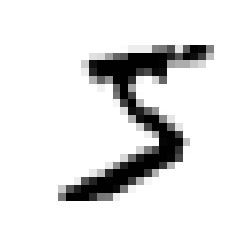

In [0]:
plt.imshow(some_digit_shape, cmap = mpl.cm.binary, interpolation='nearest' )
plt.axis('off'
        )
plt.show()

In [0]:
y[0]

'5'

In [0]:
y = y.astype(np.uint8)

In [0]:
X_train, X_test, y_train, y_test = X[:60000], X[60000:], y[:60000],y[60000:]

In [0]:
y_train_5 = (y_train == 5)
y_test_5 = (y_test == 5)

In [0]:
from sklearn.linear_model import SGDClassifier

In [0]:
sgd_clf = SGDClassifier(random_state =42)
sgd_clf.fit(X_train,y_train )

SGDClassifier(alpha=0.0001, average=False, class_weight=None,
              early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
              l1_ratio=0.15, learning_rate='optimal', loss='hinge',
              max_iter=1000, n_iter_no_change=5, n_jobs=None, penalty='l2',
              power_t=0.5, random_state=42, shuffle=True, tol=0.001,
              validation_fraction=0.1, verbose=0, warm_start=False)

In [0]:
sgd_clf.predict([some_digit])


array([3], dtype=uint8)

CROSS VALIDATION

In [0]:
from sklearn.model_selection import StratifiedKFold
from sklearn.base import clone

In [0]:
skfolds = StratifiedKFold(n_splits = 3, random_state=42)

In [0]:
for train_index, test_index in skfolds.split(X_train, y_train_5):
  clone_clf = clone(sgd_clf)
  X_train_folds = X_train[train_index]
  y_train_folds = y_train_5[train_index]
  X_test_fold = X_train[test_index]
  y_test_fold = y_train_5[test_index]
  
  clone_clf.fit(X_train_folds, y_train_folds)
  
  y_pred = clone_clf.predict(X_test_fold)
  n_correct = sum(y_pred == y_test_fold)
  print(n_correct / len(y_pred))

0.95035
0.96035
0.9604


In [0]:
from sklearn.base import BaseEstimator

In [0]:
from sklearn.model_selection import cross_val_score


In [0]:
cross_val_score(sgd_clf, X_train, y_train_5, cv = 3, scoring ='accuracy')

array([0.95035, 0.96035, 0.9604 ])

In [0]:
class Never5Classifier(BaseEstimator):
  def fit(self, X, y = None):
    pass
  def predict(self, X):
    return np.zeros((len(X),1), dtype=bool)

In [0]:
never_5_clf = Never5Classifier()
cross_val_score(never_5_clf, X_train, y_train_5, cv = 3, scoring = 'accuracy')

array([0.91125, 0.90855, 0.90915])

In [0]:
from sklearn.model_selection import cross_val_predict 

In [0]:
y_train_pred = cross_val_predict(sgd_clf, X_train, y_train_5, cv = 3)

In [0]:
from sklearn.metrics import confusion_matrix

In [0]:
confusion_matrix(y_train_5, y_train_pred)

array([[53892,   687],
       [ 1891,  3530]])

In [0]:
y_train_prefect_prediction = y_train_5

In [0]:
confusion_matrix(y_train_5, y_train_prefect_prediction)

array([[54579,     0],
       [    0,  5421]])

PERCEPTRON

In [0]:
iris = load_iris()
X = iris.data[:, (2,3)]
y = (iris.target == 0).astype(np.int)

In [0]:
per_clf = Perceptron()
per_clf.fit(X,y)

Perceptron(alpha=0.0001, class_weight=None, early_stopping=False, eta0=1.0,
           fit_intercept=True, max_iter=1000, n_iter_no_change=5, n_jobs=None,
           penalty=None, random_state=0, shuffle=True, tol=0.001,
           validation_fraction=0.1, verbose=0, warm_start=False)

In [0]:
y_pred = per_clf.predict([[2,0.5]])

In [0]:
y_pred

array([0])



```
# This is formatted as code
```

##Keras mix

In [0]:
tf.__version__

'2.0.0-beta0'

In [0]:
keras.__version__

'2.2.4-tf'

In [0]:
fashion_mnist = keras.datasets.fashion_mnist

In [0]:
(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist.load_data()

4423680/4422102 [==============================] - 0s 0us/step


In [0]:
X_train_full.shape, X_train_full.dtype

((60000, 28, 28), dtype('uint8'))

In [0]:
X_valid, X_train = X_train_full[:5000] /255.0, X_train_full[5000:]/255.0
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]

In [0]:
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat",
"Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

In [0]:
class_names[y_train[0]], y_train[0]

('Coat', 4)

In [0]:
model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape = [28, 28]))
model.add(keras.layers.Dense(300, activation = 'relu'))
model.add(keras.layers.Dense(100, activation = 'relu'))
model.add(keras.layers.Dense(10, activation = 'softmax'))


In [0]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 300)               235500    
_________________________________________________________________
dense_1 (Dense)              (None, 100)               30100     
_________________________________________________________________
dense_2 (Dense)              (None, 10)                1010      
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


In [0]:
model.layers, len(model.layers)

([<tensorflow.python.keras.layers.core.Flatten at 0x7f79b66be0b8>,
 4)

In [0]:
model.layers[2].name

'dense_1'

In [0]:
model.compile(loss ='sparse_categorical_crossentropy', 
              optimizer='sgd', 
              metrics=['accuracy'])

In [0]:
history = model.fit(X_train, y_train, epochs = 30, validation_data = (X_valid, y_valid))

W0813 06:12:20.364499 140161720534912 deprecation.py:323] From /usr/local/lib/python3.6/dist-packages/tensorflow/python/ops/math_grad.py:1250: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Train on 55000 samples, validate on 5000 samples
Epoch 1/30
55000/55000 [==============================] - 4s 81us/sample - loss: 0.7034 - accuracy: 0.7714 - val_loss: 0.5076 - val_accuracy: 0.8272
Epoch 2/30
55000/55000 [==============================] - 4s 79us/sample - loss: 0.4855 - accuracy: 0.8321 - val_loss: 0.5059 - val_accuracy: 0.8112
Epoch 3/30
55000/55000 [==============================] - 4s 76us/sample - loss: 0.4399 - accuracy: 0.8463 - val_loss: 0.4414 - val_accuracy: 0.8494
Epoch 4/30
55000/55000 [==============================] - 4s 77us/sample - loss: 0.4118 - accuracy: 0.8565 - val_loss: 0.4110 - val_accuracy: 0.8572
Epoch 5/30
55000/55000 [==============================] - 4s 77us/sample - loss: 0.3902 - accuracy: 0.8622 - val_loss: 0.3780 - val_accuracy: 0.8682
Epoch 6/30
55000/55000 [==============================] - 4s 78us/sample - loss: 0.3744 - accuracy: 0.8678 - val_loss: 0.3699 - val_accuracy: 0.8698
Epoch 7/30
55000/55000 [==============================] -

NameError: ignored

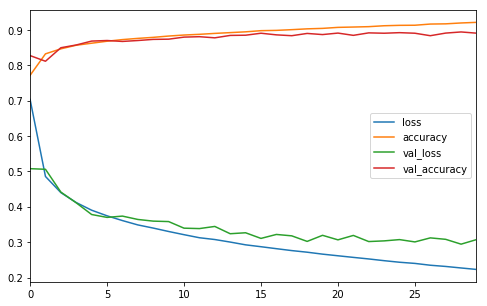

In [0]:
import pandas as pd

pd.DataFrame(history.history).plot(figsize=(8,5))

plt.grid(True)
plt.gca().set_ylim(0,1)
plt.show()

In [0]:
model.evaluate(X_test, y_test)

10000/10000 [==============================] - 0s 37us/sample - loss: 2.7819 - accuracy: 0.8246


[2.7818870161056517, 0.8246]

In [0]:
X_new = X_test[:3]
y_proba = model.predict(X_new)

In [0]:
y_proba.round(2)

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)

In [0]:
y_pred = model.predict_classes(X_new)
y_pred

array([9, 2, 1])

In [0]:
import numpy as np

In [0]:
np.array(class_names)[y_pred]

array(['Ankle boot', 'Pullover', 'Trouser'], dtype='<U11')

In [0]:
y_new = y_test[:3]
y_new

array([9, 2, 1], dtype=uint8)

Building a Regression MLP Using the Sequential API

In [0]:
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [0]:
housing = fetch_california_housing()

I0813 06:14:36.614489 140161720534912 california_housing.py:115] Downloading Cal. housing from https://ndownloader.figshare.com/files/5976036 to /root/scikit_learn_data


In [0]:
X_train_full, X_test, y_train_full, y_test = train_test_split(
housing.data, housing.target)
X_train, X_valid, y_train, y_valid = train_test_split(
X_train_full, y_train_full)

In [0]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_valid_scaled = scaler.transform(X_valid)
X_test_scaled = scaler.transform(X_test)

In [0]:
X_train.shape

(11610, 8)

In [0]:
model = keras.models.Sequential([
keras.layers.Dense(30, activation="relu", input_shape=X_train.shape[1:]),
keras.layers.Dense(1)
])

model.compile(loss="mean_squared_error", optimizer="sgd")

history = model.fit(X_train, y_train, epochs=20,
validation_data=(X_valid, y_valid))



Train on 11610 samples, validate on 3870 samples
Epoch 1/20
11610/11610 [==============================] - 0s 37us/sample - loss: nan - val_loss: nan
Epoch 2/20
11610/11610 [==============================] - 0s 34us/sample - loss: nan - val_loss: nan
Epoch 3/20
11610/11610 [==============================] - 0s 33us/sample - loss: nan - val_loss: nan
Epoch 4/20
11610/11610 [==============================] - 0s 32us/sample - loss: nan - val_loss: nan
Epoch 5/20
11610/11610 [==============================] - 0s 32us/sample - loss: nan - val_loss: nan
Epoch 6/20
11610/11610 [==============================] - 0s 33us/sample - loss: nan - val_loss: nan
Epoch 7/20
11610/11610 [==============================] - 0s 30us/sample - loss: nan - val_loss: nan
Epoch 8/20
11610/11610 [==============================] - 0s 31us/sample - loss: nan - val_loss: nan
Epoch 9/20
11610/11610 [==============================] - 0s 32us/sample - loss: nan - val_loss: nan
Epoch 10/20
11610/11610 [=================

In [0]:
mse_test = model.evaluate(X_test, y_test)
X_new = X_test[:3] # pretend these are new instances
y_pred = model.predict(X_new)

5160/5160 [==============================] - 0s 18us/sample - loss: nan


Wide and Deep network

In [0]:
input = keras.layers.Input(shape=X_train.shape[1:])
hidden1 = keras.layers.Dense(30, activation="relu")(input)
hidden2 = keras.layers.Dense(30, activation="relu")(hidden1)
concat = keras.layers.concatenate([input, hidden2])
output = keras.layers.Dense(1)(concat)
model = keras.models.Model(inputs=[input], outputs=[output])

In [0]:

input_A = keras.layers.Input(shape=[5])
input_B = keras.layers.Input(shape=[6])
hidden1 = keras.layers.Dense(30, activation="relu")(input_B)
hidden2 = keras.layers.Dense(30, activation="relu")(hidden1)
concat = keras.layers.concatenate([input_A, hidden2])
output = keras.layers.Dense(1)(concat)
#model = keras.models.Model(inputs=[input_A, input_B], outputs=[output])


Auxiliary Output

In [0]:
aux_output = keras.layers.Dense(1)(hidden2)
model = keras.models.Model(inputs = [input_A, input_B ], outputs = [output, aux_output])

In [0]:
model.compile(loss=["mse", "mse" ] , loss_weights=[0.9,0.1], optimizer="sgd")

In [0]:
X_train_A, X_train_B = X_train[:, :5], X_train[:, 2:]
X_valid_A, X_valid_B = X_valid[:, :5], X_valid[:, 2:]
X_test_A, X_test_B = X_test[:, :5], X_test[:, 2:]
X_new_A, X_new_B = X_test_A[:3], X_test_B[:3]

In [0]:
history = model.fit(
[X_train_A, X_train_B], [y_train, y_train], epochs=20,
validation_data=([X_valid_A, X_valid_B], [y_valid, y_valid]))
total_loss, main_loss, aux_loss = model.evaluate([X_test_A, X_test_B], [y_test, y_test])
y_pred_main, y_pred_aux = model.predict([X_new_A, X_new_B])

Train on 11610 samples, validate on 3870 samples
Epoch 1/20
11610/11610 [==============================] - 1s 53us/sample - loss: nan - dense_10_loss: nan - dense_11_loss: nan - val_loss: nan - val_dense_10_loss: nan - val_dense_11_loss: nan
Epoch 2/20
11610/11610 [==============================] - 0s 39us/sample - loss: nan - dense_10_loss: nan - dense_11_loss: nan - val_loss: nan - val_dense_10_loss: nan - val_dense_11_loss: nan
Epoch 3/20
11610/11610 [==============================] - 0s 39us/sample - loss: nan - dense_10_loss: nan - dense_11_loss: nan - val_loss: nan - val_dense_10_loss: nan - val_dense_11_loss: nan
Epoch 4/20
11610/11610 [==============================] - 0s 39us/sample - loss: nan - dense_10_loss: nan - dense_11_loss: nan - val_loss: nan - val_dense_10_loss: nan - val_dense_11_loss: nan
Epoch 5/20
11610/11610 [==============================] - 0s 38us/sample - loss: nan - dense_10_loss: nan - dense_11_loss: nan - val_loss: nan - val_dense_10_loss: nan - val_dense

Dynamic Models using Subclassing API

In [0]:
class WideAndDeepModel(keras.models.Model):
  def __init__(self, units= 30, activation = 'relu', **kwargs):
    super().__init__(**kwargs)
    self.hidden1 = keras.layers.Dense(units, activation=activation)
    self.hidden2 = keras.layers.Dense(units, activation=activation)
    self.main_output = keras.layers.Dense(1)
    self.aux_output = keras.layers.Dense(1)
    
  def call(self, inputs):
    input_A, input_B = inputs
    hidden1 = self.hidden1(input_B)
    hidden2 = self.hidden2(hidden1)
    concat = keras.layers.concatenate([input_A, hidden2])
    main_output = self.main_output(concat)
    aux_output = self.aux_output(hidden2)
    return main_output, aux_output
    
                                          

In [0]:
model = WideAndDeepModel()

In [0]:
#model.save("my_keras_model.h5")

In [0]:
model = keras.models.Sequential([
keras.layers.Flatten(input_shape=[28, 28]),
keras.layers.BatchNormalization(),
keras.layers.Dense(300, activation="elu", kernel_initializer="he_normal"),
keras.layers.BatchNormalization(),
keras.layers.Dense(100, activation="elu", kernel_initializer="he_normal"),
keras.layers.BatchNormalization(),
keras.layers.Dense(10, activation="softmax")
])

In [0]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_1 (Flatten)          (None, 784)               0         
_________________________________________________________________
batch_normalization (BatchNo (None, 784)               3136      
_________________________________________________________________
dense_16 (Dense)             (None, 300)               235500    
_________________________________________________________________
batch_normalization_1 (Batch (None, 300)               1200      
_________________________________________________________________
dense_17 (Dense)             (None, 100)               30100     
_________________________________________________________________
batch_normalization_2 (Batch (None, 100)               400       
_________________________________________________________________
dense_18 (Dense)             (None, 10)               

In [0]:
[(var.name, var.trainable) for var in model.layers[1].variables]

[('batch_normalization/gamma:0', True),
 ('batch_normalization/beta:0', True),
 ('batch_normalization/moving_mean:0', False),
 ('batch_normalization/moving_variance:0', False)]

In [0]:
model.layers[1].updates

[<tf.Operation 'cond/Identity' type=Identity>,
 <tf.Operation 'cond_1/Identity' type=Identity>]

In [0]:
model = keras.models.Sequential([
keras.layers.Flatten(input_shape=[28, 28]),
keras.layers.BatchNormalization(),
keras.layers.Dense(300, kernel_initializer="he_normal", use_bias=False),
keras.layers.BatchNormalization(),
keras.layers.Activation("elu"),
keras.layers.Dense(100, kernel_initializer="he_normal", use_bias=False),
keras.layers.Activation("elu"),
keras.layers.BatchNormalization(),
keras.layers.Dense(10, activation="softmax")
])

##Chapter 12 TF

In [0]:
t = tf.constant([[1,2,3.],[4,5,6.]])
t.shape, t.dtype

(TensorShape([2, 3]), tf.float32)

In [0]:
t

<tf.Tensor: id=0, shape=(2, 3), dtype=float32, numpy=
array([[1., 2., 3.],
       [4., 5., 6.]], dtype=float32)>

In [0]:

t[:,1:]

<tf.Tensor: id=5, shape=(2, 2), dtype=float32, numpy=
array([[2., 3.],
       [5., 6.]], dtype=float32)>

In [0]:




tf.square(t)

<tf.Tensor: id=7, shape=(2, 3), dtype=float32, numpy=
array([[ 1.,  4.,  9.],
       [16., 25., 36.]], dtype=float32)>

In [0]:
t@tf.transpose(t)

<tf.Tensor: id=11, shape=(2, 2), dtype=float32, numpy=
array([[14., 32.],
       [32., 77.]], dtype=float32)>

In [0]:
tf.constant(4.) + tf.cast(tf.constant(4), tf.float32)

<tf.Tensor: id=16, shape=(), dtype=float32, numpy=8.0>

In [0]:
v = tf.Variable([[1,2,3.],[4,5,6.]])

In [0]:
v

<tf.Variable 'Variable:0' shape=(2, 3) dtype=float32, numpy=
array([[1., 2., 3.],
       [4., 5., 6.]], dtype=float32)>

In [0]:
v.assign(v/2)

<tf.Variable 'UnreadVariable' shape=(2, 3) dtype=float32, numpy=
array([[0.5, 1. , 1.5],
       [2. , 2.5, 3. ]], dtype=float32)>

In [0]:
print(tf.test.is_gpu_available())


False


In [0]:
tf.test.gpu_device_name

<function tensorflow.python.framework.test_util.gpu_device_name>

In [0]:
X = tf.range(10)
dataset = tf.data.Dataset.from_tensor_slices(X)
dataset

<TensorSliceDataset shapes: (), types: tf.int32>

In [0]:
for item in dataset:
   print(item)

tf.Tensor(0, shape=(), dtype=int32)
tf.Tensor(1, shape=(), dtype=int32)
tf.Tensor(2, shape=(), dtype=int32)
tf.Tensor(3, shape=(), dtype=int32)
tf.Tensor(4, shape=(), dtype=int32)
tf.Tensor(5, shape=(), dtype=int32)
tf.Tensor(6, shape=(), dtype=int32)
tf.Tensor(7, shape=(), dtype=int32)
tf.Tensor(8, shape=(), dtype=int32)
tf.Tensor(9, shape=(), dtype=int32)


In [0]:
dataset = dataset.repeat(3).batch(7, drop_remainder=True )


In [0]:
dataset = dataset.map(lambda x : x*2)

In [0]:
dataset = dataset.filter(lambda x: x < 10)

ValueError: ignored

In [0]:
for i in dataset.take(3):
  print(i)

In [0]:
df = [0.]*8 + [tf.constant([], dtype = tf.float32)]

In [0]:
df

In [0]:
def preprocess(line):
  defs = [0.] * n_inputs + [tf.constant([], dtype=tf.float32)]
  fields = tf.io.decode_csv(line, record_defaults=defs)
  x = tf.stack(fields[:-1])
  y = tf.stack(fields[-1:])
  return (x - X_mean) / X_std, y

In [0]:
def csv_reader_dataset(filepaths, repeat=None, n_readers=5,
n_read_threads=None, shuffle_buffer_size=10000,
n_parse_threads=5, batch_size=32):
  dataset = tf.data.Dataset.list_files(filepaths).repeat(repeat)
  dataset = dataset.interleave(
  lambda filepath: tf.data.TextLineDataset(filepath).skip(1),
  cycle_length=n_readers, num_parallel_calls=n_read_threads)
  dataset = dataset.shuffle(shuffle_buffer_size)
  dataset = dataset.map(preprocess, num_parallel_calls=n_parse_threads)
  dataset = dataset.batch(batch_size)
  return dataset.prefetch(1)


In [0]:
train_set = csv_reader_dataset(train_filepaths, repeat=None)
valid_set = csv_reader_dataset(valid_filepaths)
test_set = csv_reader_dataset(test_filepaths)

In [0]:
l2_reg = keras.regularizers.l2(0.05)
model = keras.models.Sequential([
keras.layers.Dense(30, activation="elu", kernel_initializer="he_normal",
kernel_regularizer=l2_reg),
keras.layers.Dense(1, kernel_regularizer=l2_reg)
])

In [0]:
def create_huber(threshold=1.0):
  def huber_fn(y_true, y_pred):
    error = y_true - y_pred
    is_small_error = tf.abs(error) < threshold
    squared_loss = tf.square(error) / 2
    linear_loss = threshold * tf.abs(error) - threshold**2 / 2
    return tf.where(is_small_error, squared_loss, linear_loss)
  return huber_fn

In [0]:
model.compile(loss="mse", optimizer="nadam", metrics=[create_huber(2.0)])

In [0]:
model.fit(train_set, steps_per_epoch=len(X_train) // batch_size, epochs=10,
validation_data=valid_set,
validation_steps=len(X_valid) // batch_size)

NameError: ignored

In [0]:
model.evaluate(test_set, steps=len(X_test) // batch_size)
model.predict(new_set, steps=len(X_new) // batch_size)

TF Record Format

In [0]:
with tf.io.TFRecordWriter("my_data.tfrecord") as f:
  f.write(b"This is first record")
  f.write(b"This is second record")

In [0]:
filepaths = ["my_data.tfrecord"]
dataset = tf.data.TFRecordDataset(filepaths)
for item in dataset:
  print(item)

tf.Tensor(b'This is first record', shape=(), dtype=string)
tf.Tensor(b'This is second record', shape=(), dtype=string)


##Chapter 14 TF

In [0]:
from sklearn.datasets import load_sample_image
import numpy as np
import matplotlib.pyplot as plt

In [0]:
china = load_sample_image("china.jpg")/255
flower = load_sample_image("flower.jpg")/255

In [0]:
images = np.array([china, flower])

In [0]:
images.shape

(2, 427, 640, 3)

In [0]:
batch_size, height, width, channels = images.shape

In [0]:
filters = np.zeros(shape = (7,7,channels, 2), dtype = np.float32)

In [0]:
filters[:,3,:,0] = 1   #VERTICAL LINES
filters[3,:,:,1] = 1   # HORIZONTAL LINES

In [0]:
outputs = tf.nn.conv2d(images, filters, strides = 1, padding = 'SAME')

In [0]:
outputs.shape

TensorShape([2, 427, 640, 2])

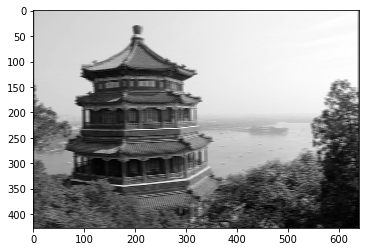

In [0]:
plt.imshow(outputs[0,:,:,1], cmap = 'gray')
plt.show()

In [0]:
output_max = tf.nn.max_pool2d(images, ksize=4, strides = 1, padding = 'SAME' )

In [0]:
output_max.shape

TensorShape([2, 427, 640, 3])

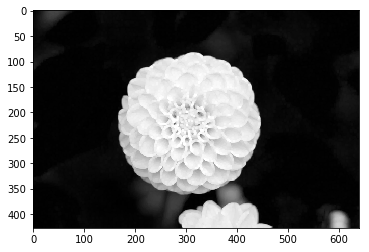

In [0]:
plt.imshow(output_max[1,:,:,0], cmap = 'gray')
plt.show()

In [0]:
conv = keras.layers.Conv2D(filters = 32, kernel_size=3, strides=1, 
                           padding="SAME", activation = 'relu')

In [0]:
from functools import partial

In [0]:
DefaultConv2d = partial(keras.layers.Conv2D, 
                       kernel_size = 3, activation ='relu', padding = 'SAME')

In [0]:
model = keras.models.Sequential([
    DefaultConv2d(filters = 64, kernel_size =7, input_shape= [28,28,1]),
    keras.layers.MaxPooling2D(pool_size=2),
    DefaultConv2d(filters = 128),
    DefaultConv2d(filters = 128),
    keras.layers.MaxPooling2D(pool_size=2),
    DefaultConv2d(filters = 256),
    DefaultConv2d(filters = 256),
    keras.layers.MaxPooling2D(pool_size=2),
    keras.layers.Flatten(),
    keras.layers.Dense(units = 128, activation='relu'),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(units = 64, activation='relu'),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(units = 10, activation='softmax'),
    
])